In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np
from  keras.utils import to_categorical

In [105]:
N = 300 
p = 150 
C = 10 
X = np.random.randn(N,p)
y = to_categorical(np.random.randint(C,size=(N,)))

Val_X = X[:100]
Val_y = y[:100]

X = X[100:]
y = y[100:]

In [106]:
model = Sequential()
model.add(Dense(20, input_dim=p))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(10,activation = 'softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
history1 = model.fit(X, y, epochs=50, batch_size=32,validation_data = [Val_X,Val_y])

Train on 200 samples, validate on 100 samples
Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 2.4219 - acc: 0.1050 - val_loss: 2.3977 - val_acc: 0.1100
Epoch 2/50
200/200 [==============================] - 0s 83us/step - loss: 2.3582 - acc: 0.1050 - val_loss: 2.3716 - val_acc: 0.1100
Epoch 3/50
200/200 [==============================] - 0s 87us/step - loss: 2.3280 - acc: 0.1050 - val_loss: 2.3540 - val_acc: 0.1100
Epoch 4/50
200/200 [==============================] - 0s 91us/step - loss: 2.3050 - acc: 0.1100 - val_loss: 2.3465 - val_acc: 0.1200
Epoch 5/50
200/200 [==============================] - 0s 88us/step - loss: 2.2892 - acc: 0.1250 - val_loss: 2.3378 - val_acc: 0.0900
Epoch 6/50
200/200 [==============================] - 0s 93us/step - loss: 2.2782 - acc: 0.1300 - val_loss: 2.3295 - val_acc: 0.1000
Epoch 7/50
200/200 [==============================] - 0s 90us/step - loss: 2.2673 - acc: 0.1450 - val_loss: 2.3355 - val_acc: 0.1000
Epoch 8/50
200/200 [====

In [108]:
train_acc_1 = history1.history['acc']
train_val_1 = history1.history["val_acc"]

In [109]:
'''
model = Sequential()
model.add(Dense(64, input_dim=p))
model.add(Activation('sigmoid'))
model.add(Dropout(0.9))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(0.9))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.9))
model.add(Dense(10,activation = 'softmax'))
'''
model = Sequential()
model.add(Dense(20, input_dim=p))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(10,activation = 'softmax'))
model.add(Dropout(0.9))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# For a multi-class classification problem
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
history2 = model.fit(X, y, epochs=50, batch_size=10,validation_data = [Val_X,Val_y])

Train on 200 samples, validate on 100 samples
Epoch 1/50
200/200 [==============================] - 1s 5ms/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 2/50
200/200 [==============================] - 0s 223us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 3/50
200/200 [==============================] - 0s 209us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 4/50
200/200 [==============================] - 0s 195us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 5/50
200/200 [==============================] - 0s 193us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 6/50
200/200 [==============================] - 0s 190us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 7/50
200/200 [==============================] - 0s 187us/step - loss: nan - acc: 0.1100 - val_loss: nan - val_acc: 0.0700
Epoch 8/50
200/200 [==============================] - 0s 195

In [101]:
train_acc_2 = history2.history['acc']
train_val_2 = history2.history["val_acc"]

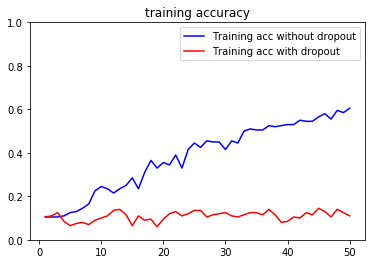

In [114]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_acc_1) + 1) #plots every epoch, here 10
plt.plot(epochs, train_acc_1, "b", label = "Training acc without dropout") # "bo" gives dot plot
plt.plot(epochs, train_acc_2, "r", label = "Training acc with dropout") # "bo" gives dot plot
#plt.plot(epochs, val_acc, "r", label = "Validation acc") # "b" gives line plot
plt.title("training accuracy")
plt.ylim((0,1))
plt.legend()
plt.savefig("train_acc_compare")
plt.show()

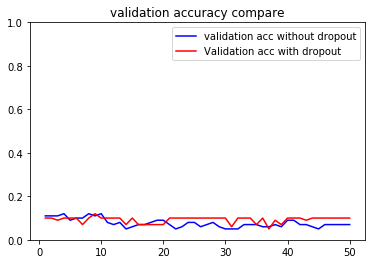

In [115]:
epochs = range(1, len(train_acc_1) + 1) #plots every epoch, here 10
plt.plot(epochs, train_val_1, "b", label = "validation acc without dropout") # "bo" gives dot plot
plt.plot(epochs, train_val_2, "r", label = "Validation acc with dropout") # "bo" gives dot plot
#plt.plot(epochs, val_acc, "r", label = "Validation acc") # "b" gives line plot
plt.title("validation accuracy compare")
plt.ylim((0,1))
plt.legend()
plt.savefig("drop_out")
plt.show()